In [2]:
import numpy as np
from pathlib import Path
from utils.analysis.tools import simDir, periodicity_plot
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

In [ ]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/"
              "workspace/05_TimeDelay/20240218_ExploreDelayReentrantHill/"
              "M1_1.0_b_-0.25_g_-0.1_c_0.025_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_300.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

In [9]:
sim.write_properties()

Text(0.5, 0.98, 'Time Delay = 300')

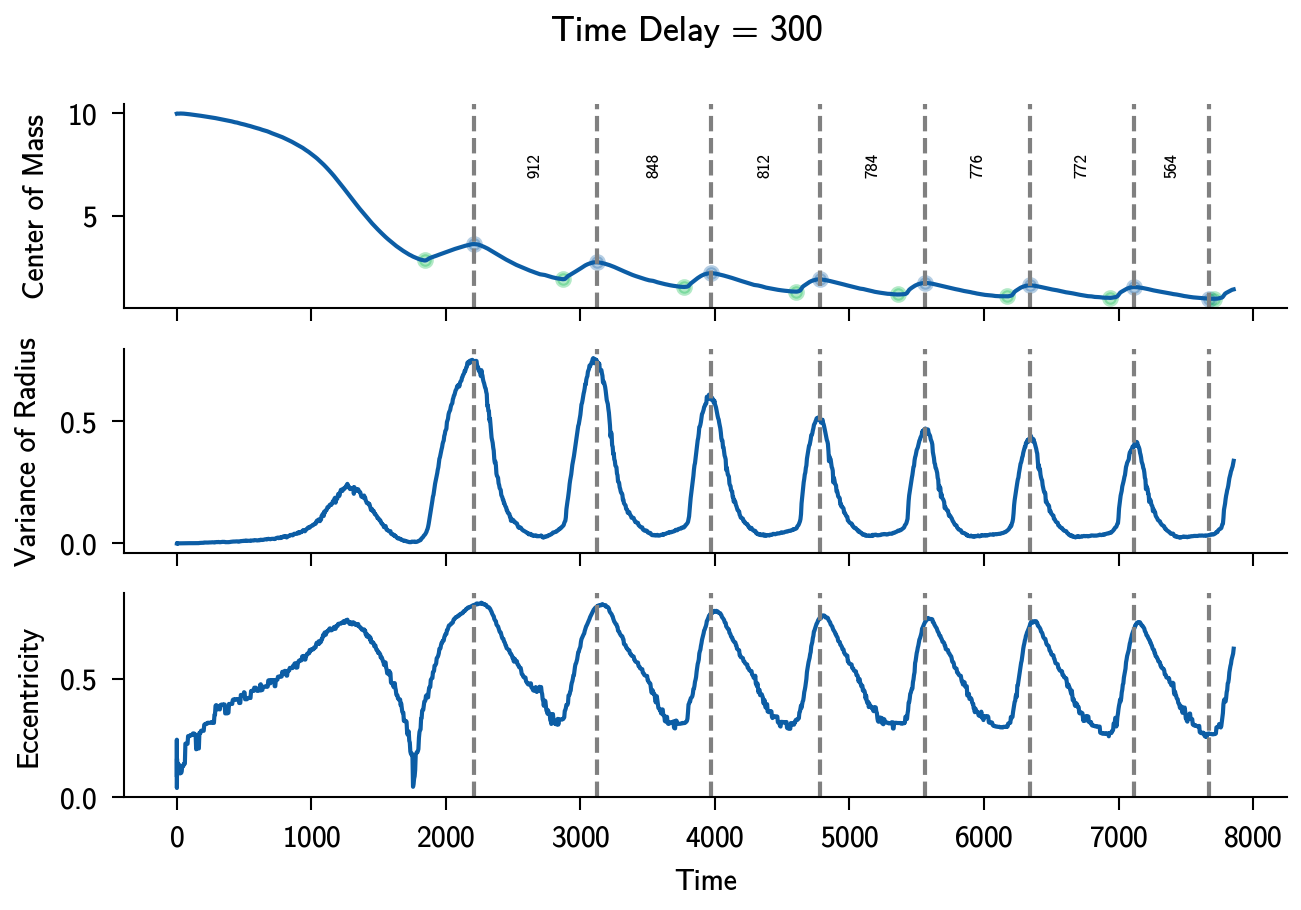

In [33]:
fig1,axes1 = periodicity_plot(sim)
fig1.suptitle("Time Delay = 300")


In [ ]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/"
              "workspace/05_TimeDelay/20240218_ExploreDelayReentrant_copy/"
              "M1_1.0_b_-0.25_g_-0.1_c_0.025_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_500.0")
sim = simDir(folder)
sim.run()
sim.condensate()

Text(0.5, 0.98, 'Time Delay = 500')

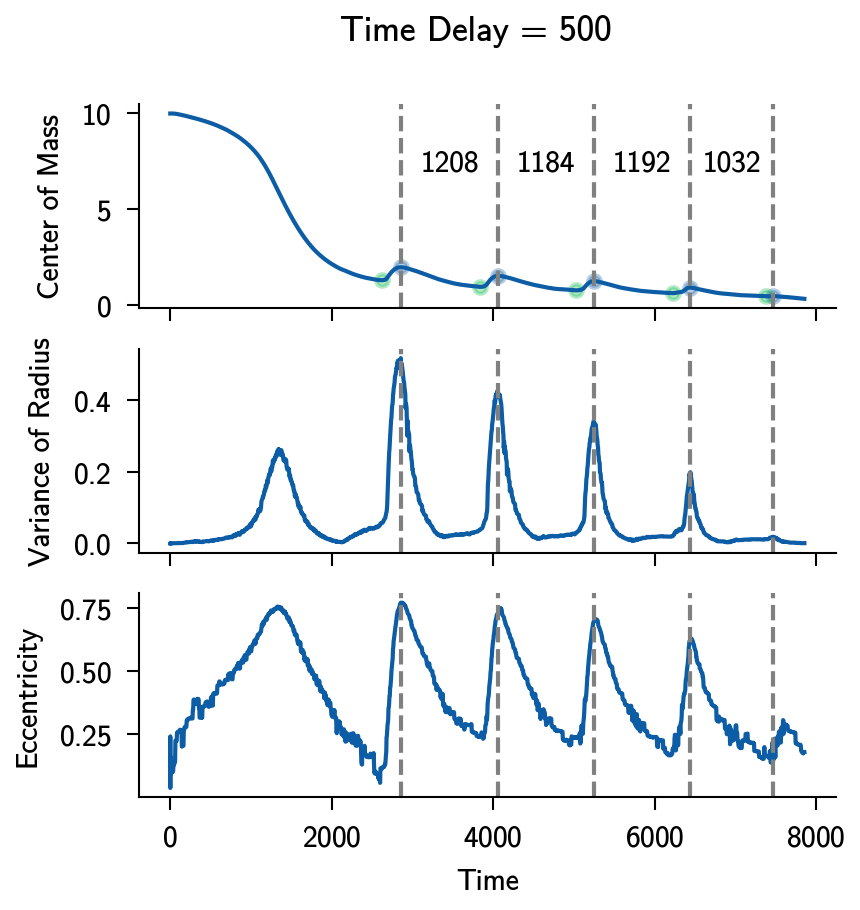

In [6]:
fig2, axes2 = periodicity_plot(sim,sigma=5)
fig2.suptitle("Time Delay = 500")

In [3]:
x = np.linspace(3,5)

Text(0, 0.5, 'Effect on RNA transcription')

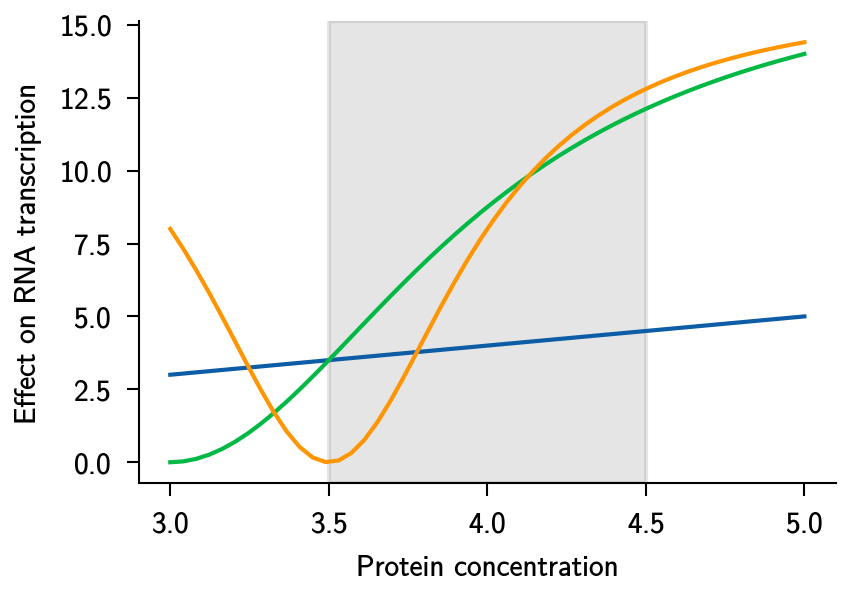

In [10]:
fig, ax = plt.subplots()
y = x
ax.plot(x,y)
y = 17.5*(x-3)**2/((x-3)**2+1**2)
ax.plot(x,y)

y = 16*(x-3.5)**2/((x-3.5)**2+0.5**2)

ax.plot(x,y)
ax.axvspan(3.5, 4.5,alpha=0.2,color="grey")
ax.set_xlabel("Protein concentration")
ax.set_ylabel("Effect on RNA transcription")

In [3]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240222_DelayReentrantHillLongerFaster/M1_1.0_b_-0.25_g_-0.1_c_0.025_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_300.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

Using default movie parameters.


Text(0.5, 0.98, 'Time Delay = 300')

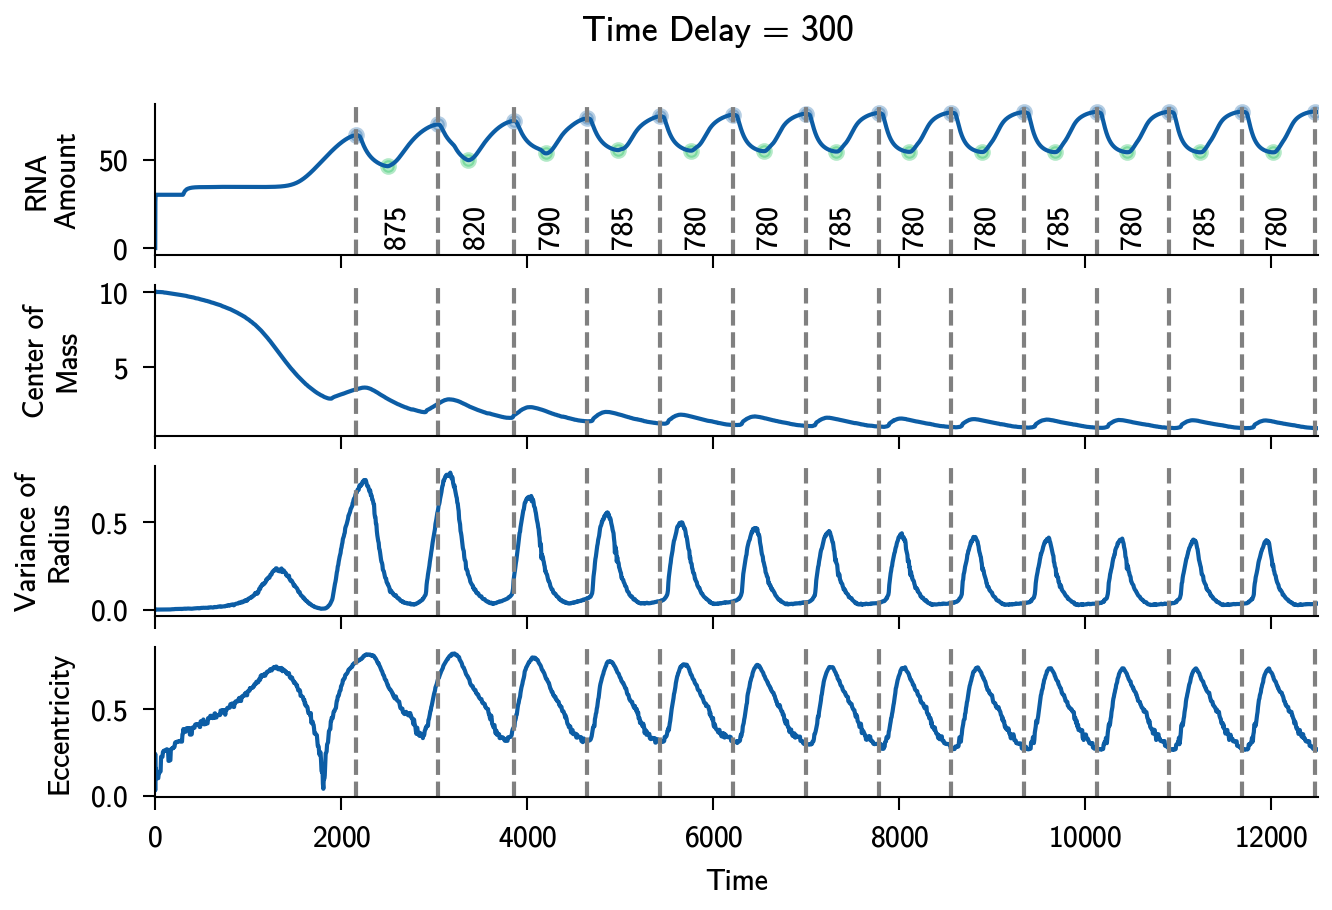

In [4]:
fig, axes, peaks, troughs = periodicity_plot(sim,2000,rightlim=12500)
fig.suptitle("Time Delay = 300")

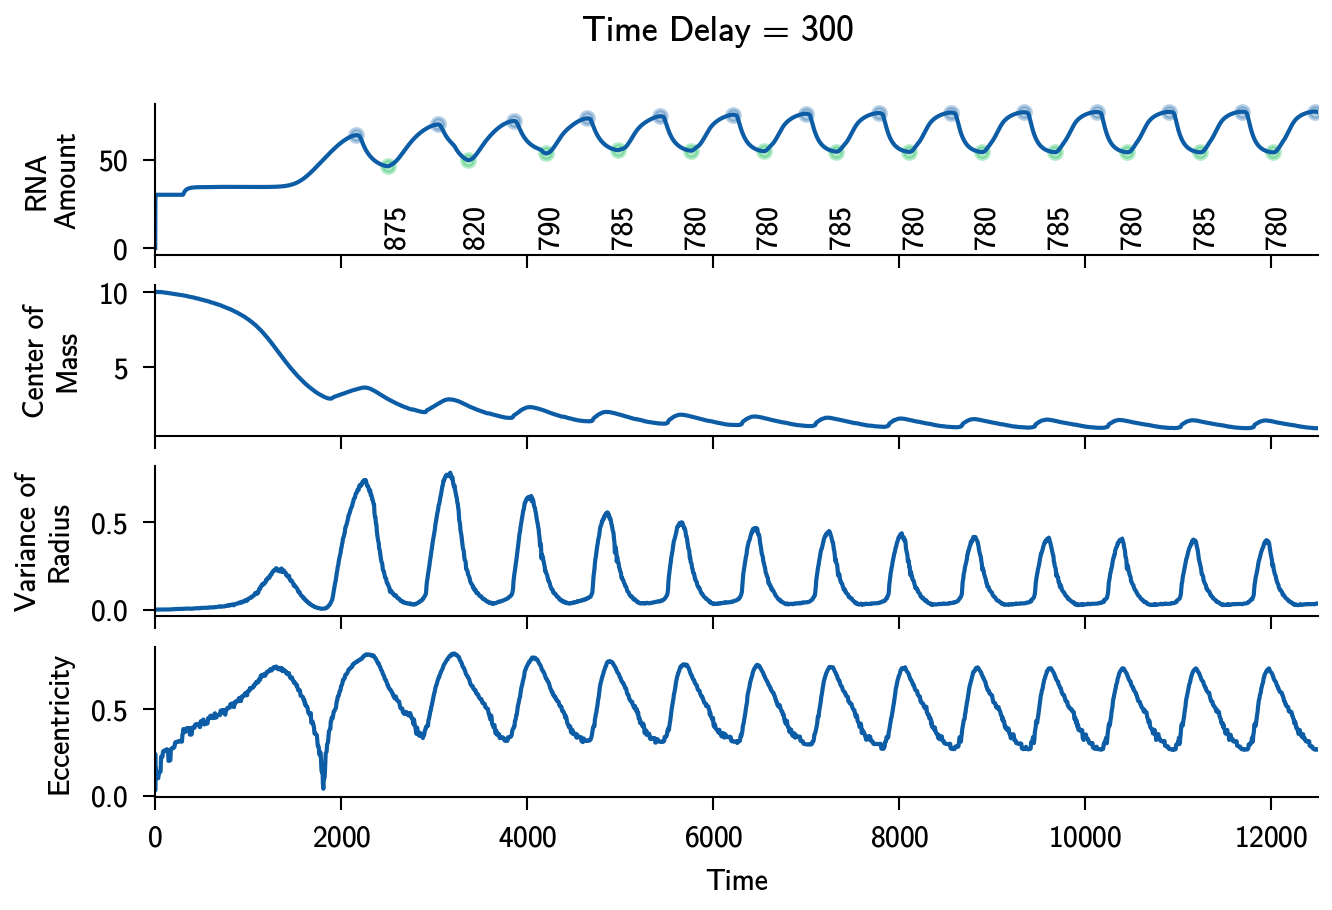

In [5]:
def periodicity_plot(sim,threshold,leftlim=0,rightlim=20000):
    from scipy.signal import find_peaks
    sim.rna()
    rna = np.ravel(sim.rna_amount)
    com = np.ravel(sim.com[:,0])
    time = np.ravel(sim.time)
    fig,axes = plt.subplots(4,1,sharex=True)
    fig.set_size_inches(5,3)

    axes[0].plot(time,rna)
    
    start = np.argmin((time-threshold)**2)
    
    peaks = find_peaks(rna[start:])[0] + start
    troughs = find_peaks(-rna[start:])[0] + start
    mid = ((peaks+troughs)/2).astype(int)
    axes[0].scatter(time[peaks],rna[peaks],alpha=0.3)
    axes[0].scatter(time[troughs],rna[troughs],alpha=0.3)
    diffs = np.diff(time[peaks],axis=0)
    locst = (time[peaks][:-1] + time[peaks][1:])/2
    for i in range(len(diffs)):
        axes[0].annotate(f"{diffs[i].item():.0f}",(locst[i],0),ha='center',rotation=90,
                         va='bottom')
    # np.diff(trunct[troughs[0]],axis=0)
    axes[1].plot(time,com)
    axes[2].plot(time,np.var(sim.radius,axis=1))

    axes[3].plot(time,sim.eccentricity)

    axes[3].set_xlabel("Time")
    axes[0].set_ylabel("RNA\nAmount")
    axes[1].set_ylabel("Center of\nMass")
    axes[2].set_ylabel("Variance of\nRadius")
    axes[3].set_ylabel("Eccentricity")
    axes[3].set_xlim(left=leftlim,right=rightlim)
    return fig,axes,peaks,troughs
fig, axes, peaks, troughs = periodicity_plot(sim,2000,rightlim=12500)
fig.suptitle("Time Delay = 300")
fig.savefig("temp.png",dpi=1200)

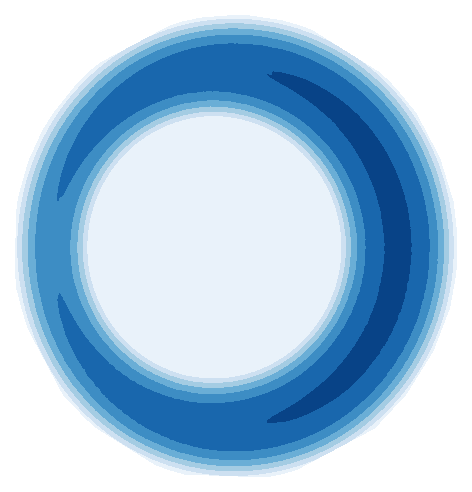

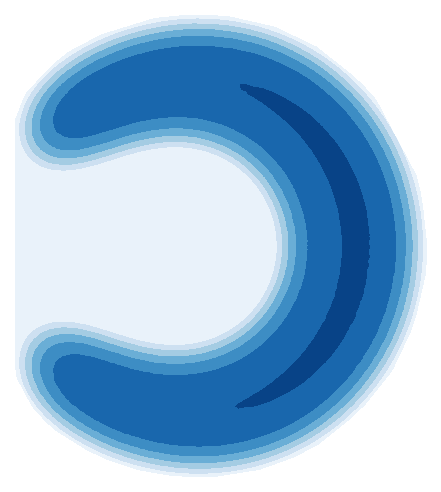

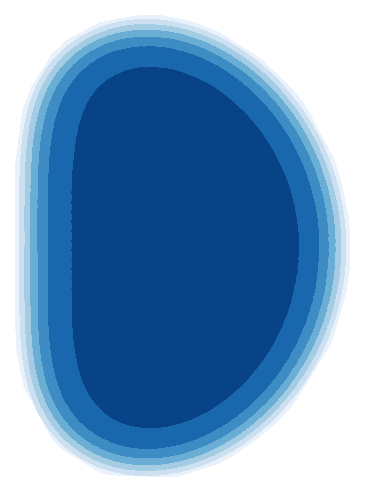

In [6]:
mid = ((peaks+troughs)/2).astype(int)
time = peaks[47]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])
time = mid[47]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])
time = troughs[47]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])

In [21]:
mask = np.sqrt(np.sum(sim.xy**2,axis=1))<7

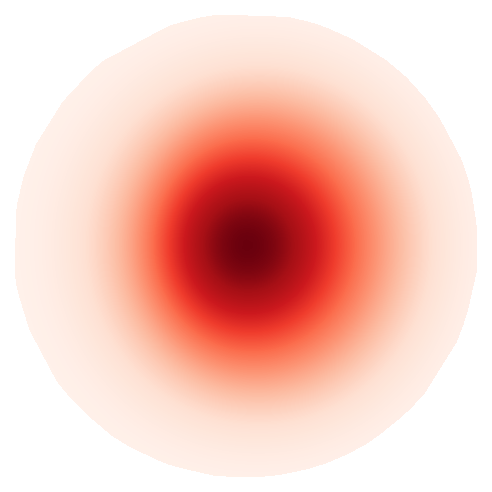

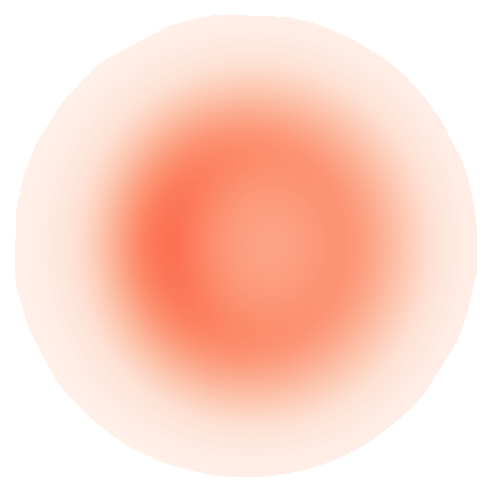

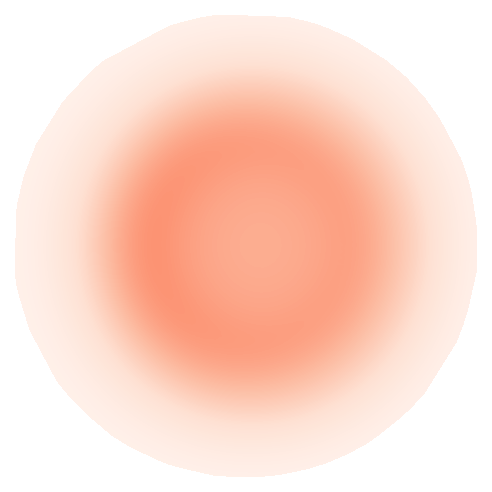

In [22]:
mid = ((peaks+troughs)/2).astype(int)
time = peaks[47]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[mask,:]
conc = sim.concentration_profile[1][time][mask]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][1],
                levels=np.linspace(int(sim.plotting_range[1][0]*100)*0.01,
                                                        int(sim.plotting_range[1][1]*100)*0.01,
                                                        256))
time = mid[47]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[mask,:]
conc = sim.concentration_profile[1][time][mask]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][1],
                levels=np.linspace(int(sim.plotting_range[1][0]*100)*0.01,
                                                        int(sim.plotting_range[1][1]*100)*0.01,
                                                        256))
time = troughs[47]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[mask,:]
conc = sim.concentration_profile[1][time][mask]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][1],
                levels=np.linspace(int(sim.plotting_range[1][0]*100)*0.01,
                                                        int(sim.plotting_range[1][1]*100)*0.01,
                                                        256))

In [40]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240222_DelayReentrantHillLongerFaster/M1_1.0_b_-0.25_g_-0.1_c_0.025_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_400.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

Using default movie parameters.


Text(0.5, 0.98, 'Time Delay = 400')

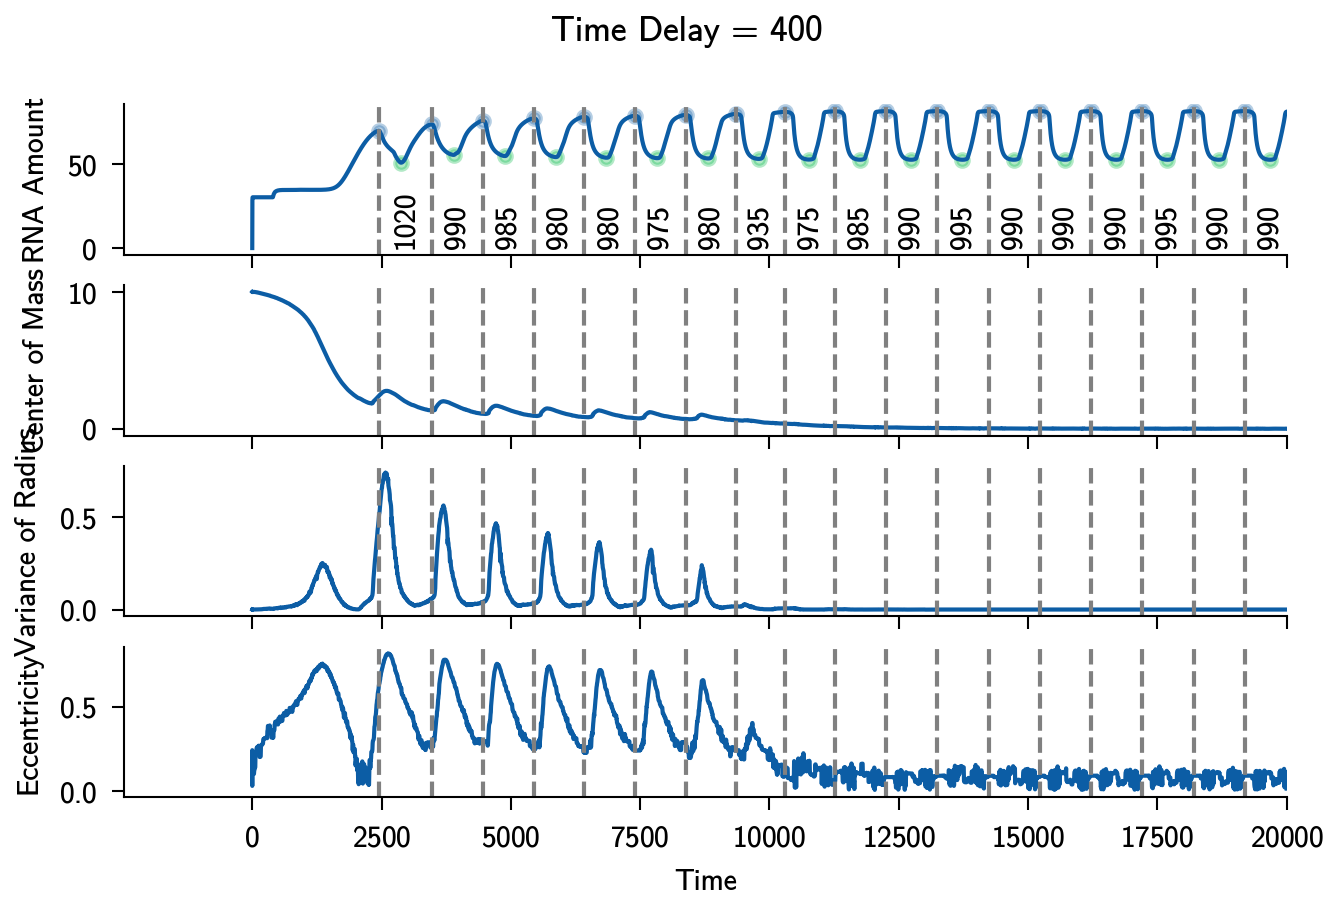

In [41]:
fig2, axes2 = periodicity_plot(sim,2000)
fig2.suptitle("Time Delay = 400")

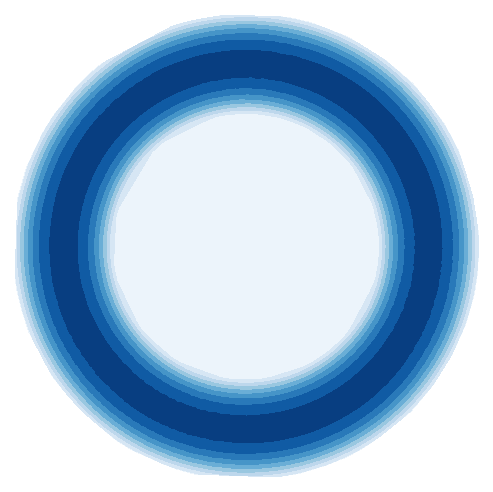

In [55]:
mid = ((peaks+troughs)/2).astype(int)
time = peaks[47]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])

In [52]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240222_DelayReentrantHillLongerFaster/M1_1.0_b_-0.25_g_-0.1_c_0.025_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_500.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

Using default movie parameters.


Text(0.5, 0.98, 'Time Delay = 500')

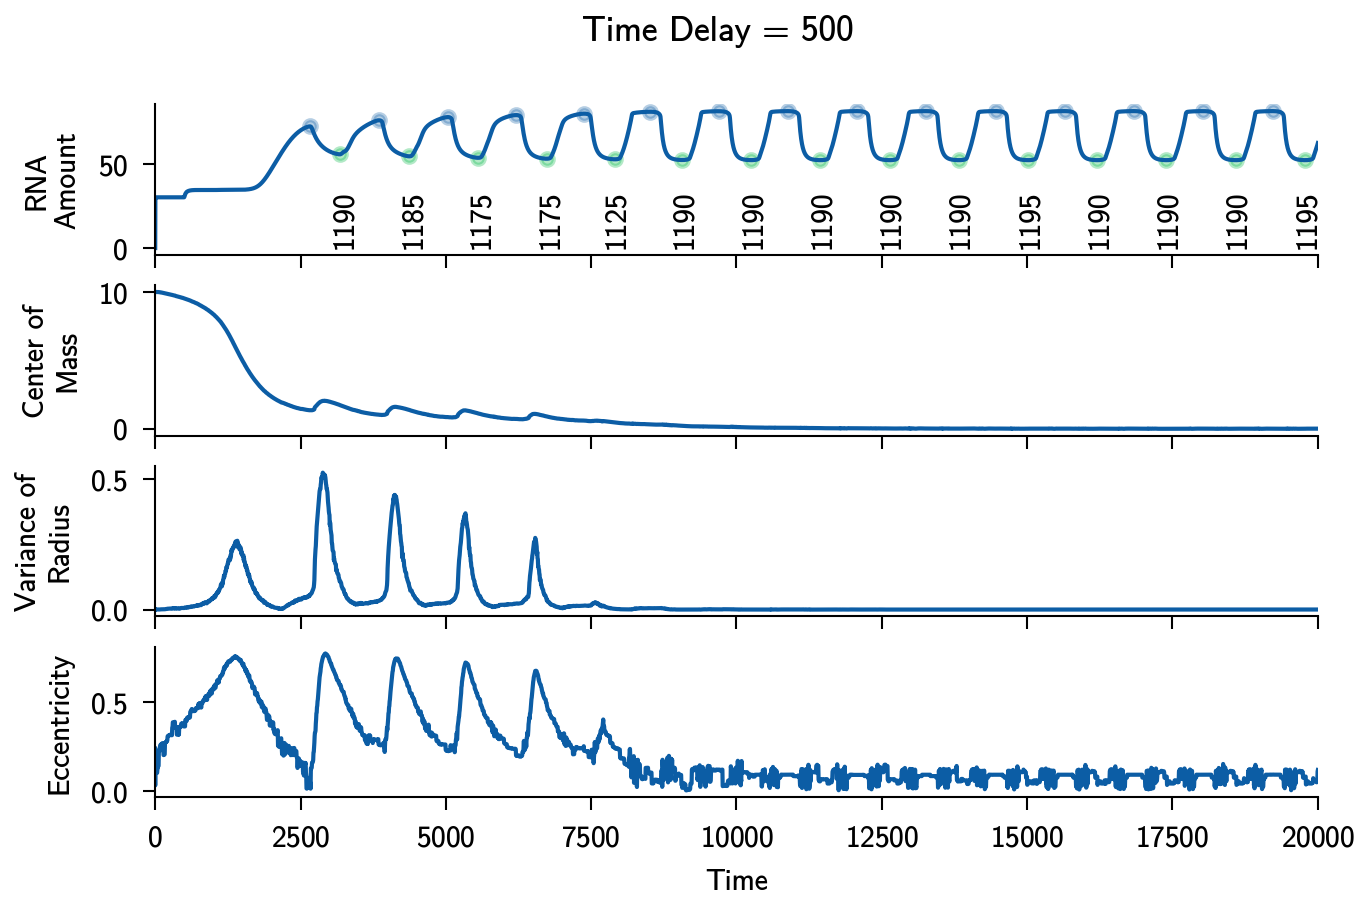

In [53]:
fig, axes, peaks, troughs = periodicity_plot(sim,2000)
fig.suptitle("Time Delay = 500")

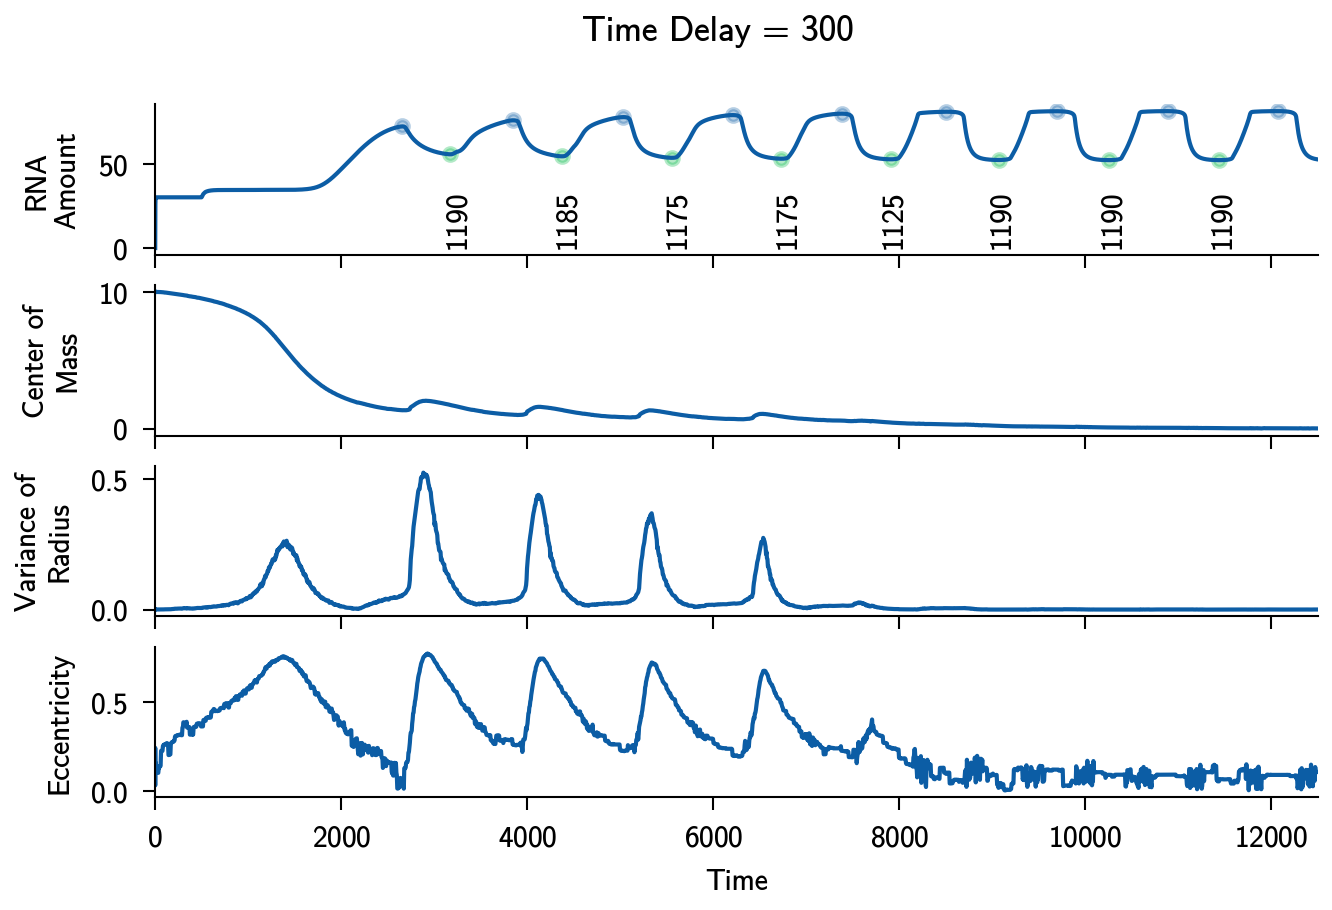

In [54]:
def periodicity_plot(sim,threshold,leftlim=0,rightlim=20000):
    from scipy.signal import find_peaks
    sim.rna()
    rna = np.ravel(sim.rna_amount)
    com = np.ravel(sim.com[:,0])
    time = np.ravel(sim.time)
    fig,axes = plt.subplots(4,1,sharex=True)
    fig.set_size_inches(5,3)

    axes[0].plot(time,rna)
    
    start = np.argmin((time-threshold)**2)
    
    peaks = find_peaks(rna[start:])[0] + start
    troughs = find_peaks(-rna[start:])[0] + start
    mid = ((peaks+troughs)/2).astype(int)
    axes[0].scatter(time[peaks],rna[peaks],alpha=0.3)
    axes[0].scatter(time[troughs],rna[troughs],alpha=0.3)
    diffs = np.diff(time[peaks],axis=0)
    locst = (time[peaks][:-1] + time[peaks][1:])/2
    for i in range(len(diffs)):
        axes[0].annotate(f"{diffs[i].item():.0f}",(locst[i],0),ha='center',rotation=90,
                         va='bottom')
    # np.diff(trunct[troughs[0]],axis=0)
    axes[1].plot(time,com)
    axes[2].plot(time,np.var(sim.radius,axis=1))

    axes[3].plot(time,sim.eccentricity)

    axes[3].set_xlabel("Time")
    axes[0].set_ylabel("RNA\nAmount")
    axes[1].set_ylabel("Center of\nMass")
    axes[2].set_ylabel("Variance of\nRadius")
    axes[3].set_ylabel("Eccentricity")
    axes[3].set_xlim(left=leftlim,right=rightlim)
    return fig,axes,peaks,troughs
fig, axes, peaks, troughs = periodicity_plot(sim,2000,rightlim=12500)
fig.suptitle("Time Delay = 300")
fig.savefig("temp.png",dpi=1200)

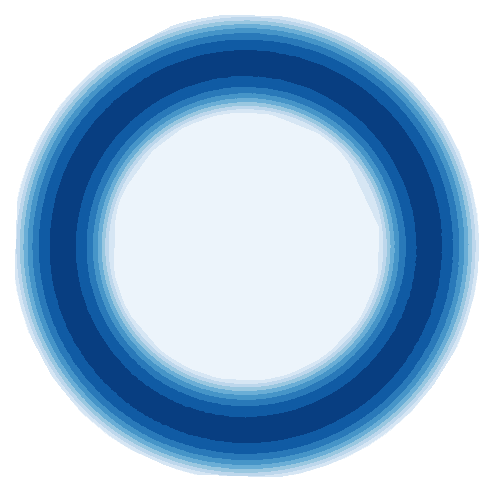

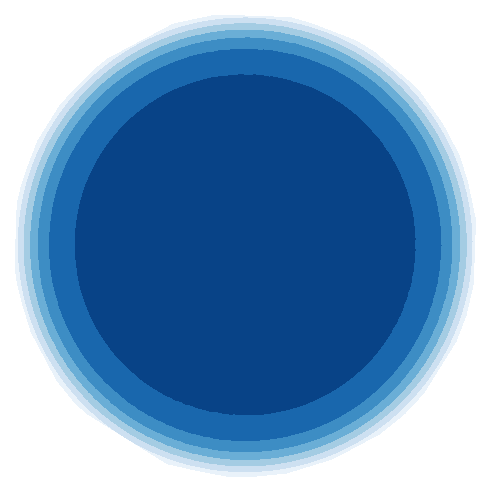

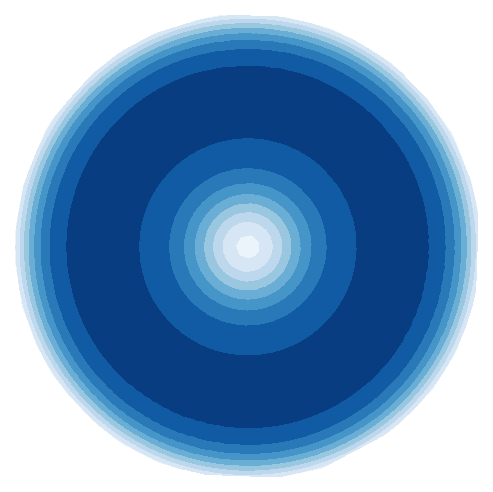

In [61]:
mid = ((peaks+troughs)/2).astype(int)
time = peaks[30]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])
time = troughs[30]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])
time = mid[30]+21
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])

In [64]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240222_DelayReentrantHillLongerFaster/M1_1.0_b_-0.25_g_-0.1_c_0.03_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_500.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

Using default movie parameters.


Text(0.5, 0.98, 'Time Delay = 500')

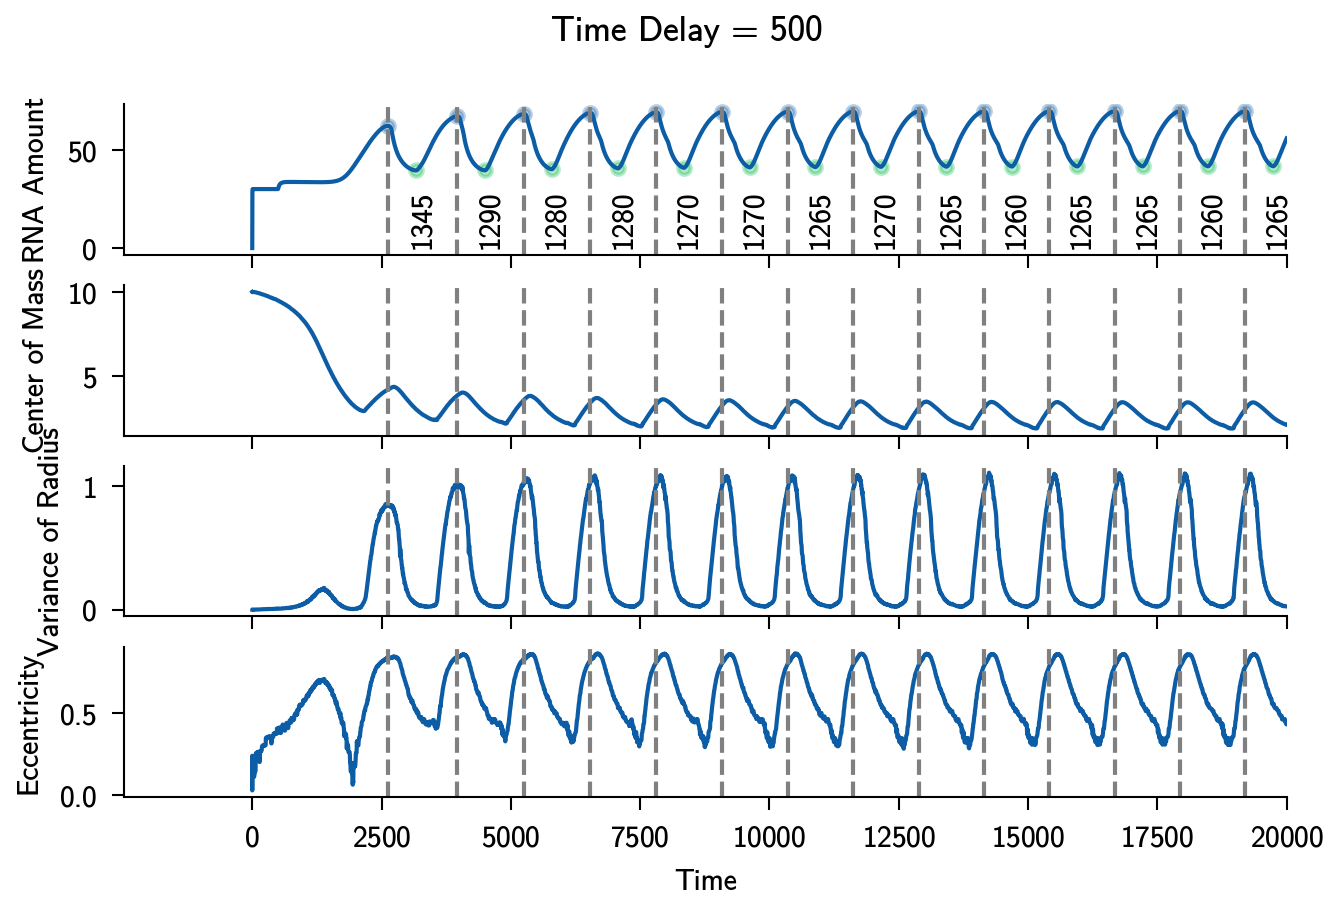

In [65]:
fig, axes, peaks, troughs = periodicity_plot(sim,2000)
fig.suptitle("Time Delay = 500")

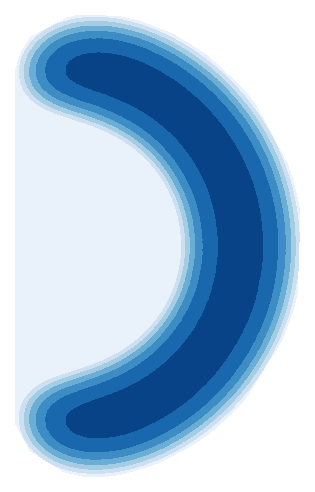

In [68]:
mid = ((peaks[:-1]+troughs)/2).astype(int)
time = peaks[30]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])

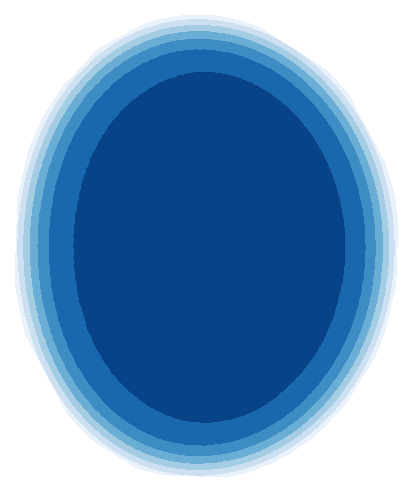

In [69]:
time = troughs[30]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
plt.tricontourf(x,y,conc,cmap=sim.movie_params['color_map'][0])